**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Aula 05:** Apresentação de Redes Neurais Artificiais
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/notebooks/aula05_redes_neurais.ipynb)



# Redes Neurais

Neste notebook, examinaremos redes neurais. Em essência, as redes neurais podem ser vistas como um agrupamento de neurônios, sendo que existem diversas formas de realizar esse agrupamento.

Vamos trabalhar neste notebook apenas a organização em uma sequência de camadas conhecida como *feedforward multilayer perceptron* (MLP), dado ser esta a forma mais intuitiva. Qualquer estudo de rede neural deve iniciar com uma percepção do que é um neurônio.

#$ Neurônio

O neurônio é uma abstração matemática que conterá um grupo de parâmetros associados a ele. Esses parâmetros são os elementos treináveis e a sua quantidade depende do número de elementos que entram no neurônio. Por exmplo, vamos assumir que temos um neurônio que receberá três entradas $x_0$, $x_1$ e $x_2$. Nesse caso, o número de parâmetros deverá ser quatro, tente entender o motivo pela figura a seguir:

![neuron_model.jpeg](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)

Posteriormente, daremos mais noções formais sobre o neurônio, mas é interessante ter de antemão uma figura na memória.


## Rede de Neurônios

Para construir uma rede de neurônios, primeiro começamos agrupando os neurônios em **camadas**.

Uma Rede Neural Artificial típica é composta por três tipos de camadas: **entrada**, **oculta** e **saída**.

Cada camada contém uma coleção de neurônios, ou simplesmente **nós**, para abreviar. Na MLP, os nós de uma camada estão **totalmente conectados** aos nós da próxima camada. Por exemplo, supondo apenas uma camada oculta, cada nó de entrada terá uma conexão para cada nó da camada oculta. Da mesma forma, cada nó da camada oculta terá uma *conexão ponderada* para cada nó de saída.

O processamento em rede funciona da seguinte maneira. A entrada é propagada da camada de entrada para a camada oculta e, finalmente, para a camada de saída para produzir uma resposta.

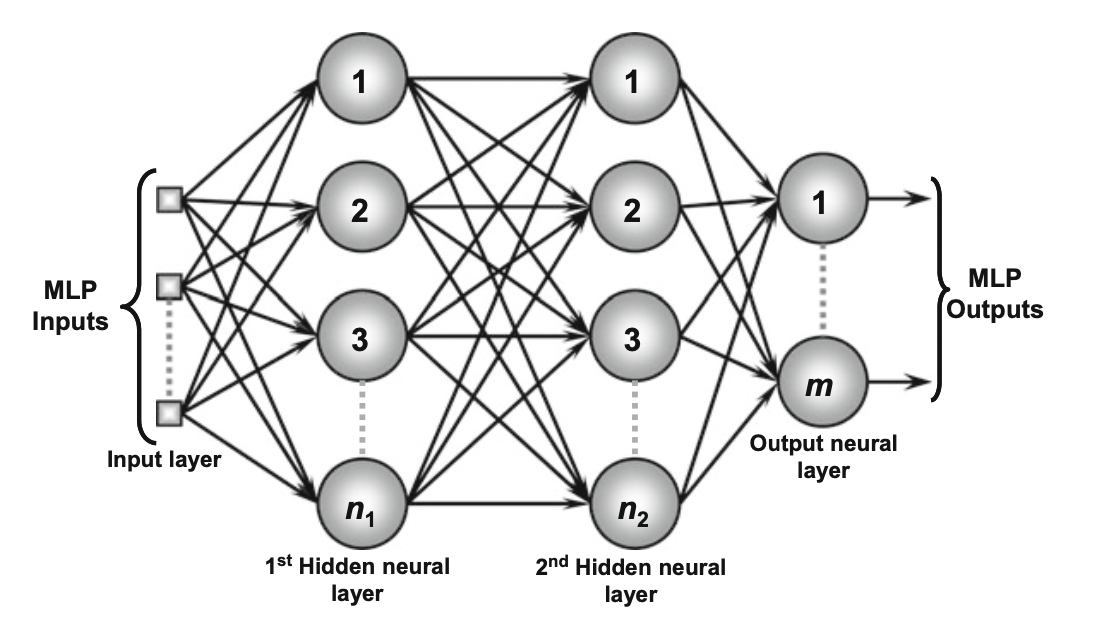

## Entendendo o Neurônio

Cada nó possui um valor de ativação que depende da saída de seus vizinhos da camada anteriores, dos pesos das conexões com a camada anterior, e de um valor adicional chamado de **bias**.

Para calcular esse valor de ativação do neurônio, primeiro computamos uma combinação linear dos valores que o neurônio recebe, ou seja, uma soma ponderada de todas as entradas recebidas da camada anterior mais o valor de bias:

$$ net_i = \sum\limits_{j=1}^n w_{ij} x_j + b_i $$

onde $w_{ij}$ é o peso da conexão do $j$-ésimo nó ao $i$-ésimo nó, $x_j$ é o valor de ativação do $j$-ésimo nó de entrada e $b_i$ é bias do nó $i$.

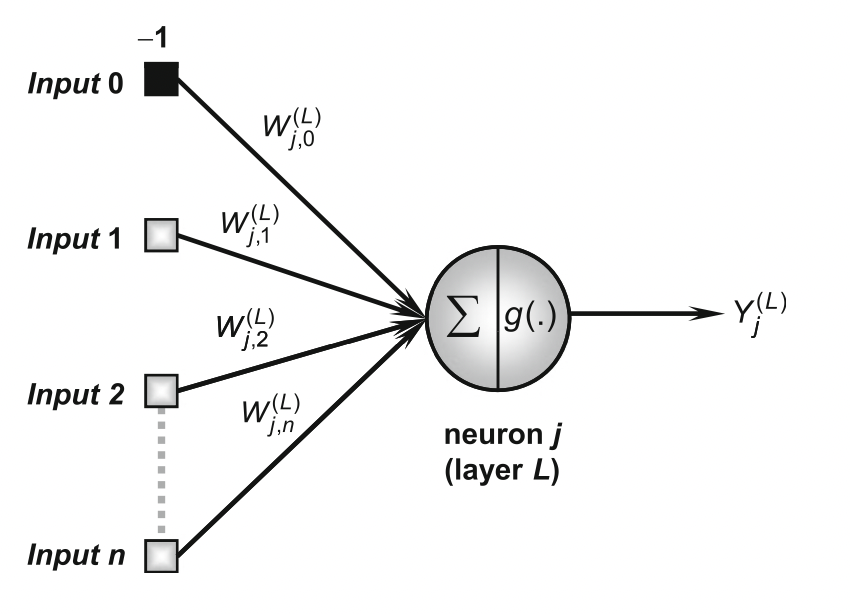

A saída do neurônio será dada pela função de ativação $g$, que receberá o valor de ativação e retornará algum valor em um intervalo apropriado. Existem várias funções de ativação que podem ser usadas, sendo as principais a *sigmóide*, a *tangente hiperbólica*, e a *relu*.

$$sigmoid(x) = \frac{1}{1 + e^{-f(x)}}$$

$$tanh(x) = \frac{e^{f(x)} - e^{-f(x)}}{e^{f(x)} + e^{-f(x)}}$$

$$relu(x) = \max\{0, f(x)\}$$

Uma intuição sobre essas funções é melhor obtida por meio de gráficos. Para gerar os gráficos a seguir, faremos $f(x) = x$ e mostraremos os valores para o intervalo [-10, 10].


In [1]:
import torch ## Importando a biblioteca
import matplotlib.pyplot as plt

In [2]:
eixo_x = torch.linspace(-10, 10, steps = 100)

sigm = 1 / (1 + torch.exp(-eixo_x))
tanh =  (torch.exp(eixo_x) - torch.exp(-eixo_x)) /  (torch.exp(eixo_x) + torch.exp(-eixo_x))
relu = eixo_x * (eixo_x > 0)

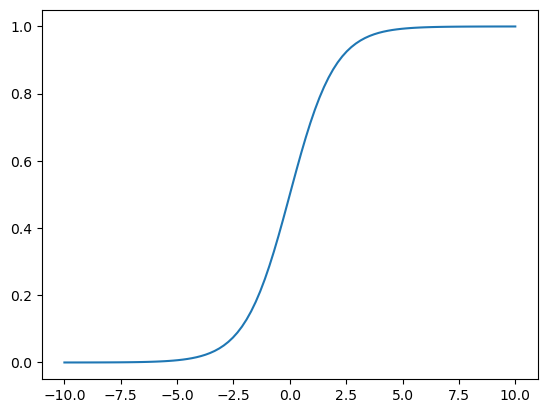

In [3]:
plt.plot(eixo_x.tolist(), sigm.tolist())

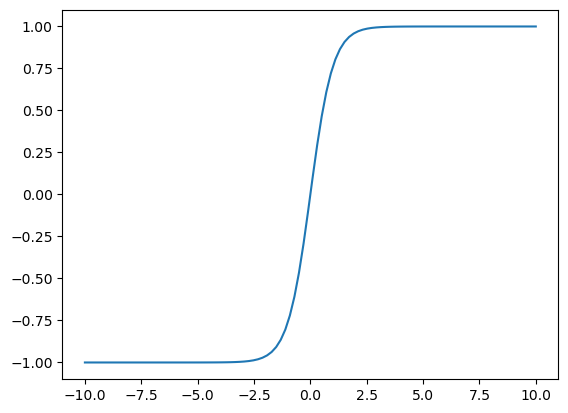

In [4]:
plt.plot(eixo_x.tolist(), tanh.tolist())

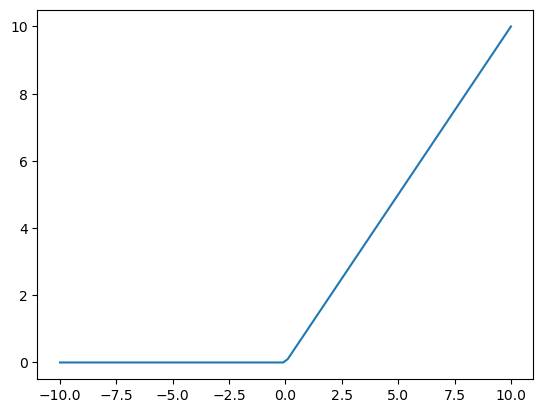

In [5]:
plt.plot(eixo_x.tolist(), relu.tolist())

## Exemplo AND

Vamos ver agora como uma rede neural com apenas 1 neurônio pode implementar o operador lógico AND. Note que na figura a seguir temos apenas duas entradas: $x_1$ e $x_2$, o valor do bias é $-30$, que aparece na figura ligado a uma entrada que sempre recebe a constante $+1$, sendo essa uma boa maneira de se representar o bias em uma figura de rede neural. A saída do neurônio é dada por:

$$ output = sigm(w_1 x_1 + w_2 x_2 + b_i) $$

Como podemos ver na figura, $w_1$ e $w_2$ têm peso $20$.



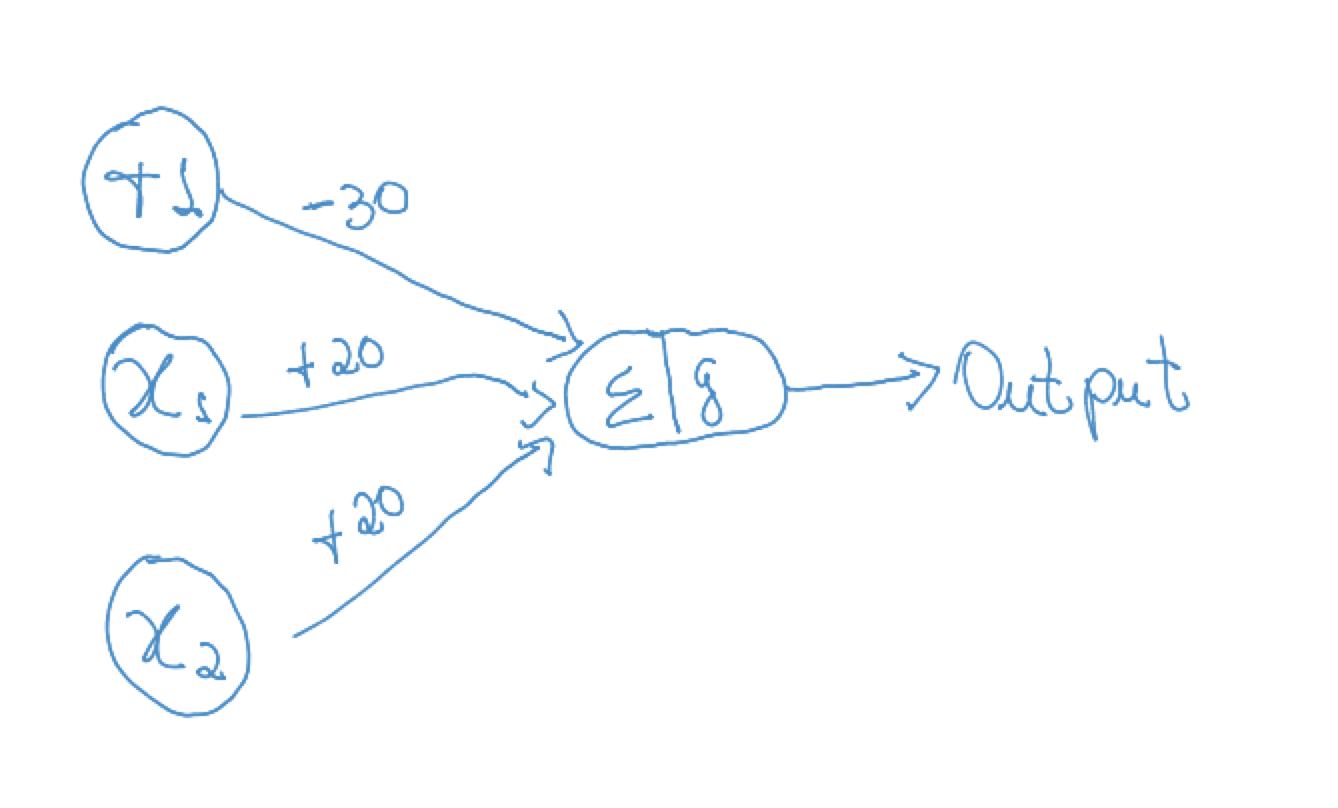

O código a seguir computa os valores para as seguintes entradas:

**Input 1** | **Input 2** | **Target**
------------|-------------|-------
 0 | 0 | sigm(-30) $\approx$ 0
 0 | 1 | sigm(-10) $\approx$ 0
 1 | 0 | sigm(-10) $\approx$ 0
 1 | 1 | sigm(10) $\approx$ 1 


In [6]:
def sigmoid(x) :
    return 1 / (1 + torch.exp(-x))

output_0 = sigmoid(torch.tensor(20*0 + 20*0 -30))
output_1 = sigmoid(torch.tensor(20*0 + 20*1 -30))
output_2 = sigmoid(torch.tensor(20*1 + 20*0 -30))
output_3 = sigmoid(torch.tensor(20*1 + 20*1 -30))

output_0, output_1, output_2, output_3

(tensor(9.3576e-14), tensor(4.5398e-05), tensor(4.5398e-05), tensor(1.0000))

## Exemplo OR

Faremos o mesmo para o OR, com uma rede neural configurada explicitamente para ele. Veja a figura a seguir:

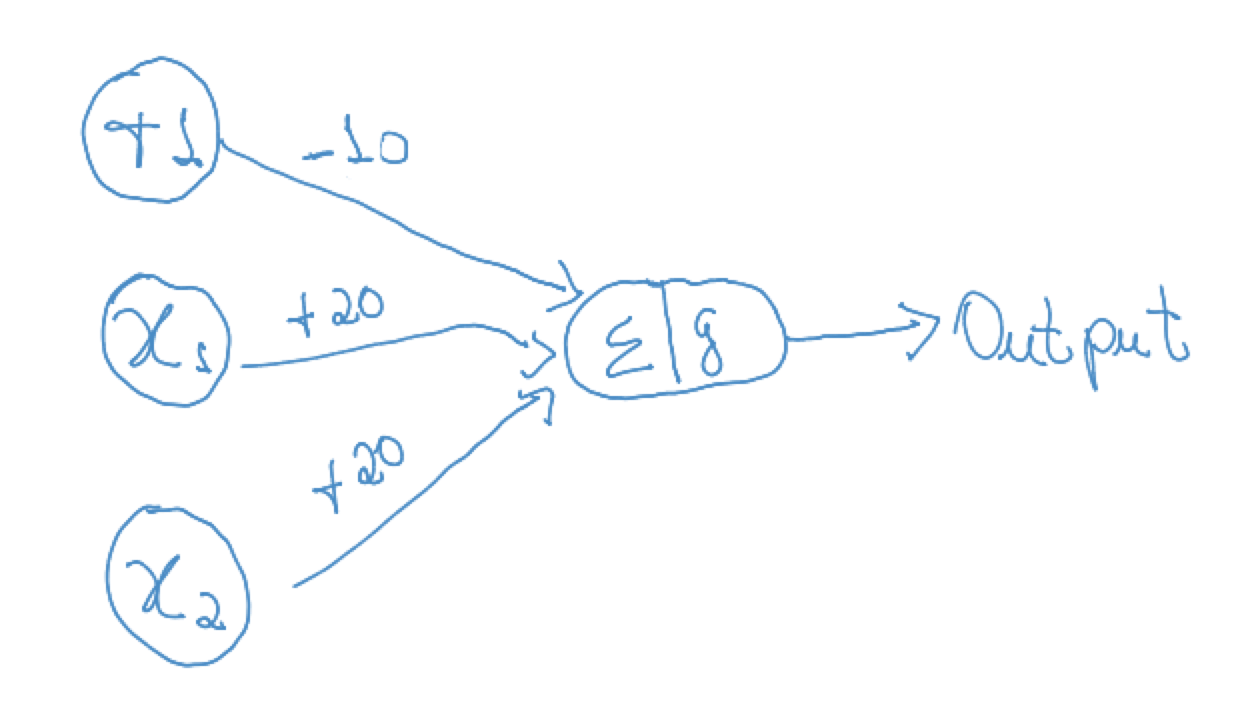

O código a seguir computa os valores para as seguintes entradas:

**Input 1** | **Input 2** | **Target**
------------|-------------|-------
 0 | 0 | sigm(-10) $\approx$ 0
 0 | 1 | sigm(10) $\approx$ 1
 1 | 0 | sigm(10) $\approx$ 1
 1 | 1 | sigm(30) $\approx$ 1 


In [7]:
def sigmoid(x) :
    return 1 / (1 + torch.exp(-x))

output_0 = sigmoid(torch.tensor(20*0 + 20*0 -10))
output_1 = sigmoid(torch.tensor(20*0 + 20*1 -10))
output_2 = sigmoid(torch.tensor(20*1 + 20*0 -10))
output_3 = sigmoid(torch.tensor(20*1 + 20*1 -10))

output_0, output_1, output_2, output_3

(tensor(4.5398e-05), tensor(1.0000), tensor(1.0000), tensor(1.))

Os pesos da rede foram colocados manualmente, como eles poderiam ser treinados?

## Como configurar os pesos?

Por muitos anos, não se sabia como aprender os pesos em uma rede neural MLP. Além disso, Marvin Minsky e Seymour Papert provaram em seu livro de 1969[Perceptrons](https://en.wikipedia.org/wiki/Perceptrons_(book)) que você não poderia fazer funções simples sem ter várias camadas. Na verdade, o que ocorreu é que a computação não estava madura o suficiente para ter as ideias que temos hoje.

Especificamente, eles olharam para a função XOR:

**Input 1** | **Input 2** | **Target**
------------|-------------|-------
 0 | 0 | 0
 0 | 1 | 1
 1 | 0 | 1
 1 | 1 | 0

Isso matou a pesquisa em redes neurais por mais de uma década. Assim, a ideia de redes neurais geralmente foi ignorada até meados da década de 1980, quando o algoritmo **BackPropagation** (backprop) foi criado.

## BackPropagation

As redes MLP se enquadram na categoria de esquemas de *aprendizado supervisionado*. Ou seja, durante o treinamento, é apresentada à rede uma entrada de treinamento, as entradas são propagadas  até que a saída apareça na camada de saída (passo **foward**). A saída é então comparada com a saída esperada ou alvo e um erro é computado. O erro é então retropropagado aplicando a regra de aprendizado (passo **backward**).

Uma regra de aprendizado modifica os pesos entre os nós. O backpropagation altera sistematicamente os pesos usando uma equação de alteração de peso, algo muito similar ao que vimos aprendemos na aula de regressão linear, mas um pouco mais complexo por conta das derivadas que precisam ser efetuadas. Por conta disso, forneceremos uma ideia do que precisaria ser feito pelo backpropagation, mas não nos preocuremos em concluir todos os cálculos.

## Uma rede neural simples

Vamos usar para ilustrar os diversos conceitos a rede neural mostrada na figura a seguir:

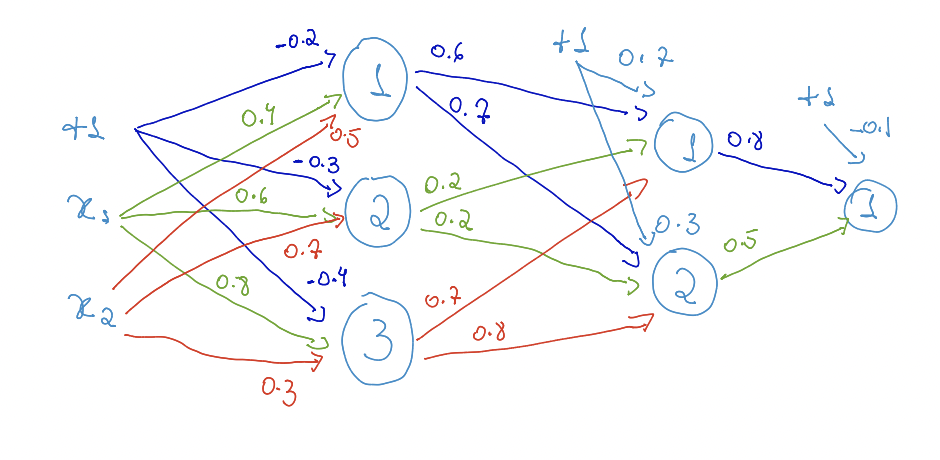

Nesta rede neural, temos:

1. Entradas: apenas duas, que são $x_1$ e $x_2$.
2. Camadas ocultas: também duas, sendo que a primeira possui três neurônios e a segunda possui dois neurônios.
3. Saída: apenas uma saída $y_1$.
4. Bias: o bias, parâmetro que não depende da camada anterior, foi implementado como um parâmetro $+1$ a ser multiplicado pelo peso sináptico que está na figura.
5. Função de Ativação: função de ativação sigmóide.


## Passo Forward

O passo **forward** é o que computa um valor na saída para uma dada entrada. Supondo uma entrada de $x_1 = 0.3$ e $x_2 = 0.7$, o passo foward seria:

### Valores de Ativação da Primeira Camada

**Passo 1: Computando o valor de ativação**

\begin{array}{cc}
	n1: &0.4 \times 0.3 + 0.5 \times 0.7 - 0.2 = 0.27 \\
	n2: &0.6 \times 0.3 + 0.7 \times 0.7 - 0.3 = 0.37 \\
	n3: &0.8 \times 0.3 + 0.3 \times 0.7 - 0.4 = 0.05
\end{array}

**Passo 2: Computando a saída:**

\begin{array}{cc}
	n1: & sigmoid(0.27) = 0.567\\
	n2: & sigmoid(0.37) = 0.591\\
	n3: & sigmoid(0.05) = 0.512
\end{array}

### Notação Matricial

Isso pode ser reescrito em notação matricial como:

$$ sigmoid\left(\left[ \begin{array}{cc}
0.3 & 0.7 \\
\end{array} \right]
\times
\left[ \begin{array}{cc}
	0.4 & 0.5 \\
	0.6 & 0.7 \\
	0.8 & 0.3  
\end{array} \right]^T\right)
$$

**ToDo: Pense agora em como seria a notação matricial para as camadas seguintes**

### Implementação

Para escrever um algoritmo que computa esses valores, precisaremos adicionar algumas variáveis a partir da figura.

In [8]:
## ToDo: Escreva como você acha que deveria ser todas as matrizes
W1 = [
    [0.4, 0.5],
    [0.6, 0.7],
    [0.8, 0.3]
]
b1 = [-0.2, -0.3, -0.4]
W2 = []
b2 = []
W3 = []
b3 = []


In [9]:
W1 = torch.tensor(W1)
b1 = torch.tensor(b1)
W2 = torch.tensor(W2)
b2 = torch.tensor(b2)
W3 = torch.tensor(W3)
b3 = torch.tensor(b3)

In [10]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)
print(W3.shape)
print(b3.shape)

torch.Size([3, 2])
torch.Size([3])
torch.Size([2, 3])
torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1])


In [11]:
## ToDo: Escreva a função forward com base na tabela.
## O termo A1 já foi feito, faça os outros baseado nele.
def forward(X, W1, b1, W2, b2, W3, b3) :
    A1 = sigmoid(torch.matmul(X , W1.T) + b1 )
    A2 = A1
    A3 = A2
    return A3



In [12]:
X = torch.tensor([ [0.3, 0.7] ])
forward(X, W1, b1, W2, b2, W3, b3)

tensor([[0.9426]])

## Função de Erro

Agora que fizemos o passo forward, podemos analisar o valor do erro com alguma função apropriada e depois propor nas matrizes de peso os valores que permitiriam encontrar uma resposta melhor.

Obviamente que, para analisar o erro, precisaremos ter uma função que nos diga o quanto estamos próximos do valor que queremos atingir.

Seguindo o que fizemos em aulas anteriores, computaríamos o erro quadrático médio neste momento. Em outras palavras, para cada instância $j$ do nosso banco de dados, computaríamos:

$$erro = \sum_{(f_j, l_j)} \frac{(nn(f_j) - r_j)^2}{N},$$

onde $nn$ seria a saída do último neurónio da rede neural (o que consequentemente seria a resposta da rede), $f_j$ seria o vetor de características (*features*) vindo do banco de dados e $l_j$ o rótulo (label) associado à instância.

## Passo Backward

O passo **backward** é aquele que computará os valores necessários para alterar os pesos das matrizes. Como você já deve imaginar, usaremos o gradiente da função de erro em função de cada um dos parâmetros para fazer isso.

Em outras palavras, a regra geral é a mesma para todos os neurônios: **computar a derivada parcial em função dos pesos sinápticos**. Entretanto, dependendo da camada onde o neurônio está, a computação pode ser mais fácil, ou mais difícil.

## Gradientes da camada de saída

Vamos assumir um neurônio de index $j$ na última camada que, segundo o nosso exemplo, seria a terceira camada. A sua saída é computada da seguinte forma:

$$Y_j^{(3)} = sigmoid(\sum W_{ji}^{(3)} \cdot Y_i^{(2)} + b_i^{(3)}),$$

onde $W^{(3)}$ é a matriz de pesos da última camada, $b^{(3)}$ é o vetor de bias da última camada e $Y^{(2)}$ é a saída penúltima camada.

Podemos notar, então, que o valor do $j$-ésimo neurônio da camada 3, $Y_j^{(3)}$, é computado por uma função composta: $$Y_j^{(3)} = sigmoid(I_j^{(3)}),$$

onde $I_j^{(3)}$ pode ser dado pela fórmula:
 $$I_j^{(3)} = \sum W_{ji}^{(3)} \cdot Y_i^{(2)} + b^{(3)}$$


Assim, derivar o erro em função dos pesos seria feito usando a regra da cadeia:

$$\frac{\partial erro}{\partial W_{ji}^{(3)}} = \frac{\partial erro}{\partial Y_{j}^{(3)}} \cdot \frac{\partial Y_{j}^{(3)}}{\partial I_{j}^{(3)}} \cdot \frac{\partial I_{j}^{(3)}}{\partial W_{ji}^{(3)}}$$

Esses valores são fáceis de obter da seguinte forma:

* $\frac{\partial I_{j}^{(3)}}{\partial W_{ji}^{(3)}} = Y_i^{(2)}$

* $\frac{\partial Y_{j}^{(3)}}{\partial I_{j}^{(3)}} = sigmoid'(I_j^{(3)})$

* $\frac{\partial erro}{\partial Y_{j}^{(3)}} = 2  (Y_j^{(3)} - l_j)$


Nesse caso, ajustar o erro na camada de saída seria feito assim:

$$\frac{\partial erro}{\partial W_{ji}^{(3)}} += - \eta \frac{\partial erro}{\partial W_{ji}^{(3)}},$$

onde $\eta$ é a função de ativação, um número muito pequeno que multiplicará as derivadas parciais.

Observe que a computação para o bias seria muito similar:

$$\frac{\partial erro}{\partial W_{ji}^{(3)}} = \frac{\partial erro}{\partial Y_{j}^{(3)}} \cdot \frac{\partial Y_{j}^{(3)}}{\partial I_{j}^{(3)}} \cdot \frac{\partial I_{j}^{(3)}}{\partial b_{i}^{(3)}},$$

onde $\frac{\partial I_{j}^{(3)}}{\partial b_{i}^{(3)}} = 1$

## Gradientes da segunda camada oculta

Para a última camada oculta (camada 2), podemos definir a computação *foward* de forma similar à camada de saída, dado que o passo *forward* de todas as camadas não se altera.

$$Y_j^{(2)} = sigmoid(\sum W_{ji}^{(2)} \cdot Y_i^{(1)} + b_i^{(2)}),$$

onde $W^{(2)}$ é a matriz de pesos da última camada, $b^{(2)}$ é o vetor de bias da última camada e $Y^{(1)}$ é a saída penúltima camada.

Podemos notar, então, que o valor do $j$-ésimo neurônio da camada 2, $Y_j^{(2)}$, é computado por uma função composta: $$Y_j^{(2)} = sigmoid(I_j^{(2)}),$$

onde $I_j^{(2)}$ pode ser dado pela fórmula:
 $$I_j^{(2)} = \sum W_{ji}^{(2)} \cdot Y_i^{(1)} + b^{(2)}$$

Diferentemente dos neurônios pertencentes à camada de saída do MLP, os neurônios das camadas intermediárias não têm acesso direto aos valores desejados para suas saídas. Nesse caso, o gradiente precisa passar pela camada posterior, veja a formulação a seguir:

$$\frac{\partial erro}{\partial W_{ji}^{(2)}} = \frac{\partial erro}{\partial Y_{j}^{(3)}} \cdot \left(\frac{\partial Y_{j}^{(3)}}{\partial Y_{j}^{(2)}}\right) \cdot \frac{\partial Y_{j}^{(2)}}{\partial I_{j}^{(2)}} \cdot \frac{\partial I_{j}^{(2)}}{\partial W_{ji}^{(2)}},$$

onde a nova derivada parcial entre parênteses $\frac{\partial Y_{j}^{(3)}}{\partial Y_{j}^{(2)}}$ pode ser obtida com:

$$\frac{\partial Y_{j}^{(3)}}{\partial Y_{j}^{(2)}} = \frac{\partial Y_{j}^{(3)}}{\partial I_{j}^{(3)}} \cdot \frac{\partial I_{j}^{(3)}}{\partial Y_{j}^{(2)}} = sigmoid'(I_j^{(3)}) \cdot W_{ji}^{(3)}$$

Vale notar que todos os termos após os parênteses estão em uma camada abaixo.

A correção dos pesos dos neurônios da segunda camada intermediária é iniciada somente após concluir o ajuste dos neurônios da camada de saída. Nessa condição particular, os valores desejados das saídas desses neurônios não estão disponíveis. Assim, seu ajuste será baseado nos pesos sinápticos já ajustados para os neurônios da camada de saída.

Em outras palavras, o ajuste de seus pesos sinápticos é feito por meio de estimativas dos erros de saída produzidos por aqueles neurônios da camada posterior, que já foram ajustados.

É  neste aspecto que reside a essência do algoritmo de backpropagation, pois, primeiramente, os pesos sinápticos ajustados dos neurônios das camadas de saída são calculados comparando-se o desvio das respostas produzidas e os correspondentes valores desejados. Em segundo lugar, esse erro é retropropagado para os neurônios das camadas anteriores, ponderados pelos valores dos pesos sinápticos previamente ajustados em todas as camadas posteriores. Consequentemente, a resposta desejada de um neurônio de uma camada oculta deve ser determinada em relação aos neurônios (da camada imediatamente posterior) que estão diretamente conectados a ela e que já foram ajustados na etapa anterior.



## Gradientes da primeira camada oculta

Tudo o que foi mencionado para a segunda camada oculta vale para a primeira. Por exemplo, o passo *foward* é bastante similar:

$$Y_j^{(1)} = sigmoid(\sum W_{ji}^{(1)} \cdot Y_i^{(0)} + b_i^{(1)}),$$

onde $W^{(1)}$ é a matriz de pesos da última camada, $b^{(1)}$ é o vetor de bias da última camada e $Y^{(1)}$ é a saída penúltima camada.

Podemos notar, então, que o valor do $j$-ésimo neurônio da camada 2, $Y_j^{(1)}$, é computado por uma função composta: $$Y_j^{(1)} = sigmoid(I_j^{(1)}),$$

onde $I_j^{(1)}$ pode ser dado pela fórmula:
 $$I_j^{(1)} = \sum W_{ji}^{(1)} \cdot Y_i^{(0)} + b^{(1)}$$

 O formalismo que precisamos, nesse caso, seria:

$$\frac{\partial erro}{\partial W_{ji}^{(1)}} = \frac{\partial erro}{\partial Y_{j}^{(3)}} \cdot \left(\frac{\partial Y_{j}^{(3)}}{\partial Y_{j}^{(2)}} \cdot \frac{\partial Y_{j}^{(2)}}{\partial Y_{j}^{(1)}}\right) \cdot \frac{\partial Y_{j}^{(1)}}{\partial I_{j}^{(1)}} \cdot \frac{\partial I_{j}^{(1)}}{\partial W_{ji}^{(1)}},$$

onde a nova derivada parcial entre parênteses $\frac{\partial Y_{j}^{(2)}}{\partial Y_{j}^{(1)}}$ pode ser obtida com:

$$\frac{\partial Y_{j}^{(2)}}{\partial Y_{j}^{(1)}} = \frac{\partial Y_{j}^{(2)}}{\partial I_{j}^{(1)}} \cdot \frac{\partial I_{j}^{(2)}}{\partial Y_{j}^{(1)}} = sigmoid'(I_j^{(2)}) \cdot W_{ji}^{(2)}$$

Um ponto importante a perceber é que grande parte das derivadas já foi realmente computado na computação das derivadas das camadas, bastando guardar os valores para computações futuras.

## Implementação

A implementação do algoritmo de backpropagation em python está fora do escopo deste tutorial:

# Exemplo com Pytorch

Vamos agora aplicar a rede neural com o mesmo exemplo do *old faithful* visto em aulas anteriores. A nossa rede terá o mesmo formato da figura vista acima, sendo que nos preocuparemos em implementar o passo *foward* manualmente e deixaremos a computação das derivadas para o *pytorch*.

In [13]:
import pandas as pd
faithful = pd.read_csv("https://raw.githubusercontent.com/ulissesdias/tt003/main/notebooks/data/faithful.csv", index_col = 0)
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


<Axes: xlabel='waiting', ylabel='eruptions'>

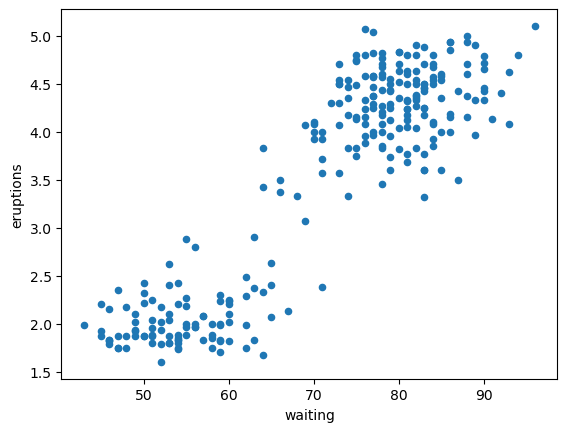

In [14]:
faithful.plot.scatter(x='waiting',
                      y='eruptions')

Vamos agora tratar a entrada. A rede precisa de dois valores de entrada, sendo que o banco de dados *old faithful* possui apenas um valor. Nesse caso, passaremos os mesmo valor duas vezes:

In [15]:
y = torch.tensor(faithful.eruptions.values, dtype = torch.float)
x = torch.tensor(faithful.waiting.values, dtype = torch.float)
x

tensor([79., 54., 74., 62., 85., 55., 88., 85., 51., 85., 54., 84., 78., 47.,
        83., 52., 62., 84., 52., 79., 51., 47., 78., 69., 74., 83., 55., 76.,
        78., 79., 73., 77., 66., 80., 74., 52., 48., 80., 59., 90., 80., 58.,
        84., 58., 73., 83., 64., 53., 82., 59., 75., 90., 54., 80., 54., 83.,
        71., 64., 77., 81., 59., 84., 48., 82., 60., 92., 78., 78., 65., 73.,
        82., 56., 79., 71., 62., 76., 60., 78., 76., 83., 75., 82., 70., 65.,
        73., 88., 76., 80., 48., 86., 60., 90., 50., 78., 63., 72., 84., 75.,
        51., 82., 62., 88., 49., 83., 81., 47., 84., 52., 86., 81., 75., 59.,
        89., 79., 59., 81., 50., 85., 59., 87., 53., 69., 77., 56., 88., 81.,
        45., 82., 55., 90., 45., 83., 56., 89., 46., 82., 51., 86., 53., 79.,
        81., 60., 82., 77., 76., 59., 80., 49., 96., 53., 77., 77., 65., 81.,
        71., 70., 81., 93., 53., 89., 45., 86., 58., 78., 66., 76., 63., 88.,
        52., 93., 49., 57., 77., 68., 81., 81., 73., 50., 85., 7

In [16]:
## Aumentando a dimensão de X e Y
yy = y.unsqueeze(-1)
xx = x.unsqueeze(-1)
xx

tensor([[79.],
        [54.],
        [74.],
        [62.],
        [85.],
        [55.],
        [88.],
        [85.],
        [51.],
        [85.],
        [54.],
        [84.],
        [78.],
        [47.],
        [83.],
        [52.],
        [62.],
        [84.],
        [52.],
        [79.],
        [51.],
        [47.],
        [78.],
        [69.],
        [74.],
        [83.],
        [55.],
        [76.],
        [78.],
        [79.],
        [73.],
        [77.],
        [66.],
        [80.],
        [74.],
        [52.],
        [48.],
        [80.],
        [59.],
        [90.],
        [80.],
        [58.],
        [84.],
        [58.],
        [73.],
        [83.],
        [64.],
        [53.],
        [82.],
        [59.],
        [75.],
        [90.],
        [54.],
        [80.],
        [54.],
        [83.],
        [71.],
        [64.],
        [77.],
        [81.],
        [59.],
        [84.],
        [48.],
        [82.],
        [60.],
        [92.],
        [7

In [17]:
## Duplicando x
xx = xx.expand(-1, 2) ## -1 significa não alterar aquela dimensão.
xx

## Mais detalhes em: https://pytorch.org/docs/stable/generated/torch.Tensor.expand.html

tensor([[79., 79.],
        [54., 54.],
        [74., 74.],
        [62., 62.],
        [85., 85.],
        [55., 55.],
        [88., 88.],
        [85., 85.],
        [51., 51.],
        [85., 85.],
        [54., 54.],
        [84., 84.],
        [78., 78.],
        [47., 47.],
        [83., 83.],
        [52., 52.],
        [62., 62.],
        [84., 84.],
        [52., 52.],
        [79., 79.],
        [51., 51.],
        [47., 47.],
        [78., 78.],
        [69., 69.],
        [74., 74.],
        [83., 83.],
        [55., 55.],
        [76., 76.],
        [78., 78.],
        [79., 79.],
        [73., 73.],
        [77., 77.],
        [66., 66.],
        [80., 80.],
        [74., 74.],
        [52., 52.],
        [48., 48.],
        [80., 80.],
        [59., 59.],
        [90., 90.],
        [80., 80.],
        [58., 58.],
        [84., 84.],
        [58., 58.],
        [73., 73.],
        [83., 83.],
        [64., 64.],
        [53., 53.],
        [82., 82.],
        [59., 59.],


In [18]:
xx = xx / x.max()
xx

tensor([[0.8229, 0.8229],
        [0.5625, 0.5625],
        [0.7708, 0.7708],
        [0.6458, 0.6458],
        [0.8854, 0.8854],
        [0.5729, 0.5729],
        [0.9167, 0.9167],
        [0.8854, 0.8854],
        [0.5312, 0.5312],
        [0.8854, 0.8854],
        [0.5625, 0.5625],
        [0.8750, 0.8750],
        [0.8125, 0.8125],
        [0.4896, 0.4896],
        [0.8646, 0.8646],
        [0.5417, 0.5417],
        [0.6458, 0.6458],
        [0.8750, 0.8750],
        [0.5417, 0.5417],
        [0.8229, 0.8229],
        [0.5312, 0.5312],
        [0.4896, 0.4896],
        [0.8125, 0.8125],
        [0.7188, 0.7188],
        [0.7708, 0.7708],
        [0.8646, 0.8646],
        [0.5729, 0.5729],
        [0.7917, 0.7917],
        [0.8125, 0.8125],
        [0.8229, 0.8229],
        [0.7604, 0.7604],
        [0.8021, 0.8021],
        [0.6875, 0.6875],
        [0.8333, 0.8333],
        [0.7708, 0.7708],
        [0.5417, 0.5417],
        [0.5000, 0.5000],
        [0.8333, 0.8333],
        [0.6

Vamos agora configurar a nossa rede neural. A rede terá a mesma estrutura da anterior, mas criaremos com as funções do PyTorch.

O pacote torch.nn (de neural network) permite definir um modelo como uma sequência
de camadas. 

O **nn.Sequential** é um módulo que permite adicionar outros módulos, e os aplica
em sequência para produzir o resultado.

O módulo **nn.Sequential.Linear** calcula a saída
a partir das entrada usando uma função linear. No nosso caso, são armazenados tensores internos para os três coeficientes que multiplicam com as três entradas, além de um coeficiente livre para o bias.

In [19]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 3),
    torch.nn.Sigmoid(),
    torch.nn.Linear(3, 2),
    torch.nn.Sigmoid(),
    torch.nn.Linear(2, 1),
    )

Agora é hora de configurar $\eta$ e a função de custo. Não iremos decrescer o valor de $\eta$ no laço, mas é um procedimento que poderíamos testar.

Vamos manter o uso da função de erro **MSELoss**.

In [20]:
loss_fn = torch.nn.MSELoss()
learning_rate = 0.5

Agora podemos seguir para o treinamento da rede. Note que este código é muito similar ao que temos usado até o momento.

In [21]:
for t in range(8000):
    y_pred = model(xx)

    loss = loss_fn(y_pred, yy)

    if t % 200 == 0 :
        print(t, loss.item())

    loss.backward()

    # Atualizar os pesos usando a descida por gradiente, como fizemos anteriormente.
    # Cada parâmetro é um Tensor,então podemos acessar seus gradientes como
    # fizemos antes.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Limpamos os gradientes antes de executar o backward pass.
    model.zero_grad()

0 18.32184600830078
200 0.6935188174247742
400 0.17002607882022858
600 0.15071862936019897
800 0.1475188434123993
1000 0.1450282782316208
1200 0.1430993676185608
1400 0.14160360395908356
1600 0.14043855667114258
1800 0.13952557742595673
2000 0.1388052999973297
2200 0.1382332742214203
2400 0.1377759426832199
2600 0.13740800321102142
2800 0.13711029291152954
3000 0.13686811923980713
3200 0.13667012751102448
3400 0.1365075409412384
3600 0.13637341558933258
3800 0.1362624168395996
4000 0.1361701935529709
4200 0.13609333336353302
4400 0.13602910935878754
4600 0.13597525656223297
4800 0.13593006134033203
5000 0.13589195907115936
5200 0.13585980236530304
5400 0.13583260774612427
5600 0.13580955564975739
5800 0.13579000532627106
6000 0.1357734054327011
6200 0.13575923442840576
6400 0.13574719429016113
6600 0.1357368677854538
6800 0.13572807610034943
7000 0.13572053611278534
7200 0.13571402430534363
7400 0.13570846617221832
7600 0.1357036978006363
7800 0.1356995552778244


In [22]:
model(xx)

tensor([[4.3446],
        [1.9944],
        [4.1879],
        [2.2502],
        [4.3926],
        [2.0017],
        [4.4017],
        [4.3926],
        [1.9821],
        [4.3926],
        [1.9944],
        [4.3882],
        [4.3277],
        [1.9754],
        [4.3829],
        [1.9851],
        [2.2502],
        [4.3882],
        [1.9851],
        [4.3446],
        [1.9821],
        [1.9754],
        [4.3277],
        [3.5770],
        [4.1879],
        [4.3829],
        [2.0017],
        [4.2770],
        [4.3277],
        [4.3446],
        [4.1200],
        [4.3058],
        [2.8995],
        [4.3578],
        [4.1879],
        [1.9851],
        [1.9765],
        [4.3578],
        [2.0734],
        [4.4056],
        [4.3578],
        [2.0454],
        [4.3882],
        [2.0454],
        [4.1200],
        [4.3829],
        [2.5046],
        [1.9891],
        [4.3763],
        [2.0734],
        [4.2388],
        [4.4056],
        [1.9944],
        [4.3578],
        [1.9944],
        [4

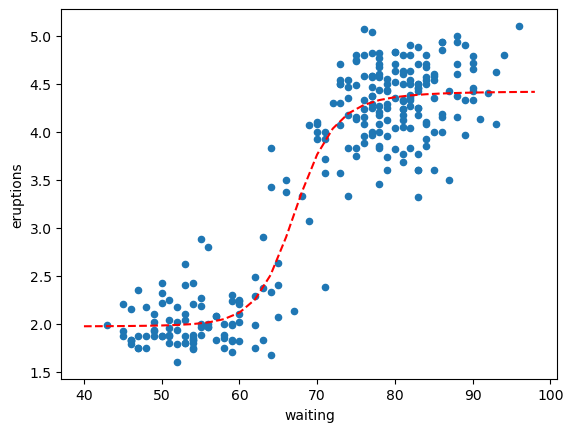

In [23]:
## Plotando os gráficos
faithful.plot.scatter(x='waiting',
                      y='eruptions')
eixo_x = torch.tensor(range(40,100,2), dtype = torch.float)
eixo_y = model((eixo_x/x.max()).unsqueeze(-1).expand(-1, 2))


## Plotando a reta
plt.plot(eixo_x.tolist(), eixo_y.tolist(), 'r--', label='Valores Obtidos')
